In [2]:
import pandas as pd
import numpy as np
import keras
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train =  pd.read_csv('/content/drive/MyDrive/LSML2/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/LSML2/fashion-mnist_test.csv')

rows, cols = 28, 28
input_shape = (rows, cols, 1)

X = np.array(train.iloc[:, 1:])
Y = to_categorical(np.array(train.iloc[:, 0]))


X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=13)


X_test = np.array(test.iloc[:, 1:])
Y_test = to_categorical(np.array(test.iloc[:, 0]))
X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1)
X_val = X_val.reshape(X_val.shape[0], rows, cols, 1)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

batch_size = 256
num_classes = 10
epochs = 50

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3) ,
    activation='relu' ,
    kernel_initializer='he_normal' ,
    input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 90s 445ms/step - loss: 0.8425 - accuracy: 0.6836 - val_loss: 0.5175 - val_accuracy: 0.8097
Epoch 2/50
188/188 [==============================] - 54s 289ms/step - loss: 0.5231 - accuracy: 0.8084 - val_loss: 0.4129 - val_accuracy: 0.8495
Epoch 3/50
188/188 [==============================] - 61s 327ms/step - loss: 0.4446 - accuracy: 0.8367 - val_loss: 0.3758 - val_accuracy: 0.8601
Epoch 4/50
188/188 [==============================] - 54s 285ms/step - loss: 0.4026 - accuracy: 0.8539 - val_loss: 0.3414 - val_accuracy: 0.8742
Epoch 5/50
188/188 [==============================] - 51s 270ms/step - loss: 0.3725 - accuracy: 0.8639 - val_loss: 0.3151 - val_accuracy: 0.8831
Epoch 6/50
188/188 [==============================] - 53s 284ms/step - loss: 0.3507 - accuracy: 0.8715 - val_loss: 0.3007 - val_accuracy: 0.8896
Epoch 7/50
188/188 [==============================] - 53s 281ms/step - loss: 0.3321 - accuracy: 0.8785 - val_loss: 0.2884 - val_ac

In [8]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1925336867570877
Test accuracy: 0.9300000071525574


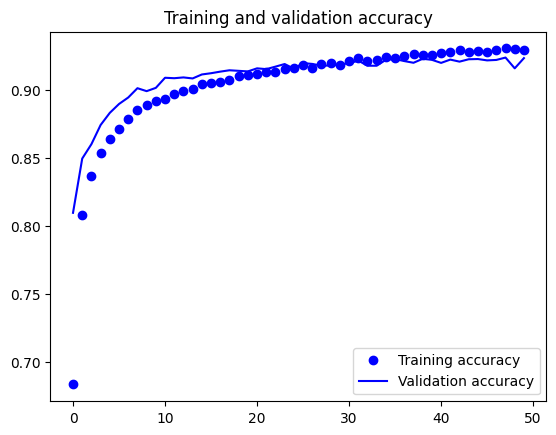

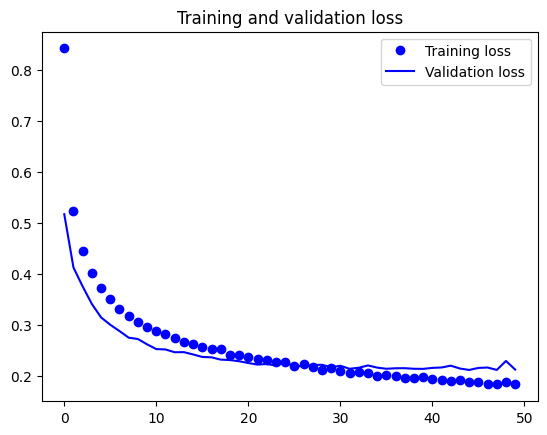

In [9]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [70]:
predicted_classes = np.argmax(model.predict(X_test),axis=1)
#
y_true = test.iloc[:, 0]

labels = {0 : "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

correct = np.nonzero(list(predicted_classes==y_true))[0]
incorrect = np.nonzero(list(predicted_classes!=y_true))[0]

#target_names = ["Class {}".format(i) for i in range(num_classes)]
#print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

     Class 0       0.88      0.89      0.88      1000
     Class 1       1.00      0.99      0.99      1000
     Class 2       0.89      0.90      0.89      1000
     Class 3       0.92      0.95      0.94      1000
     Class 4       0.90      0.89      0.89      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.81      0.78      0.80      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



<ipython-input-71-315aa10af8fc>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


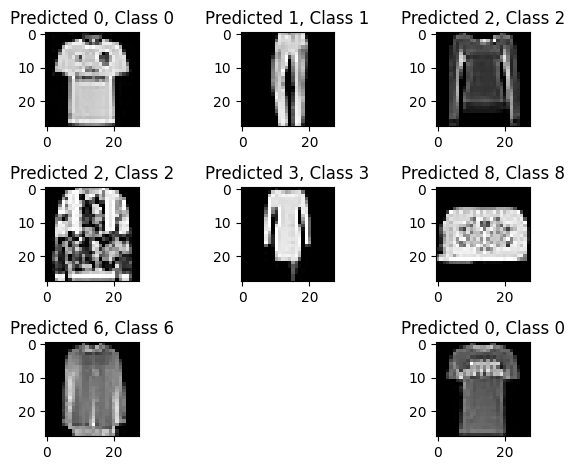

In [71]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

<ipython-input-72-9f3222ebd940>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


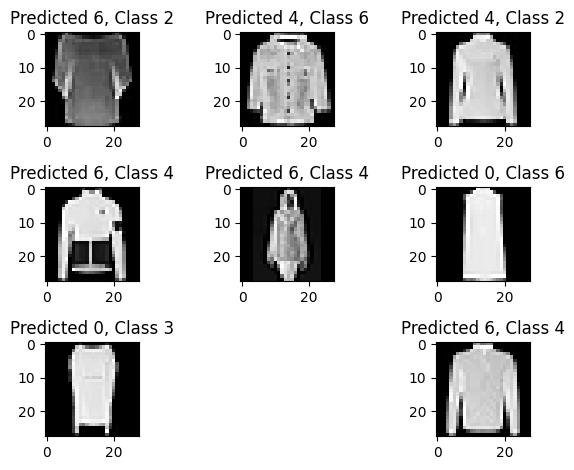

In [72]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

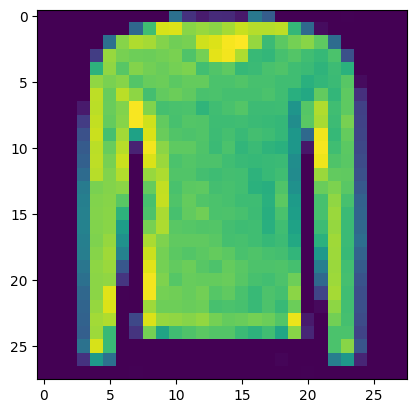

In [74]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

1/1 [==============================] - 1s 611ms/step


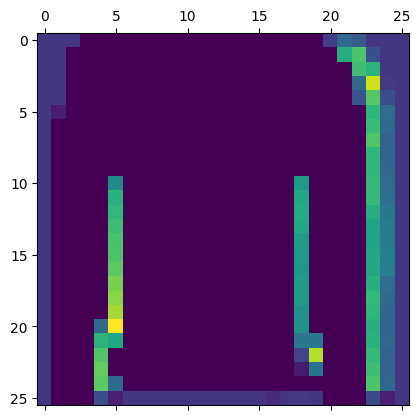

In [77]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

<ipython-input-78-75f99446fa94>:15: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


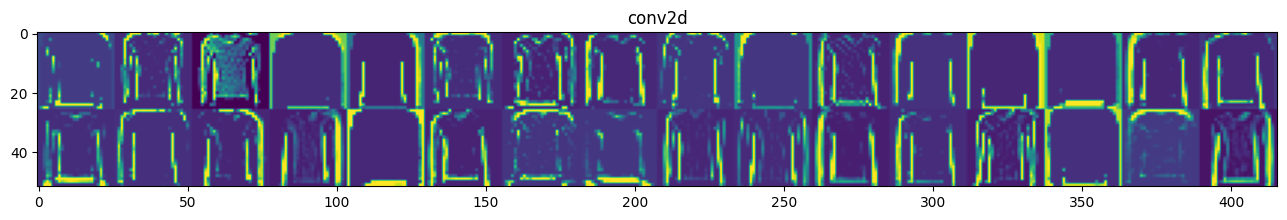

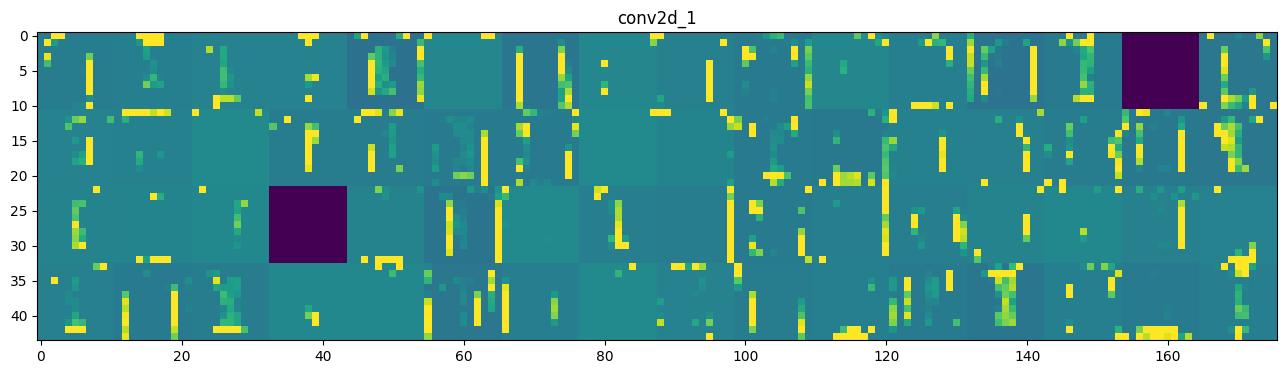

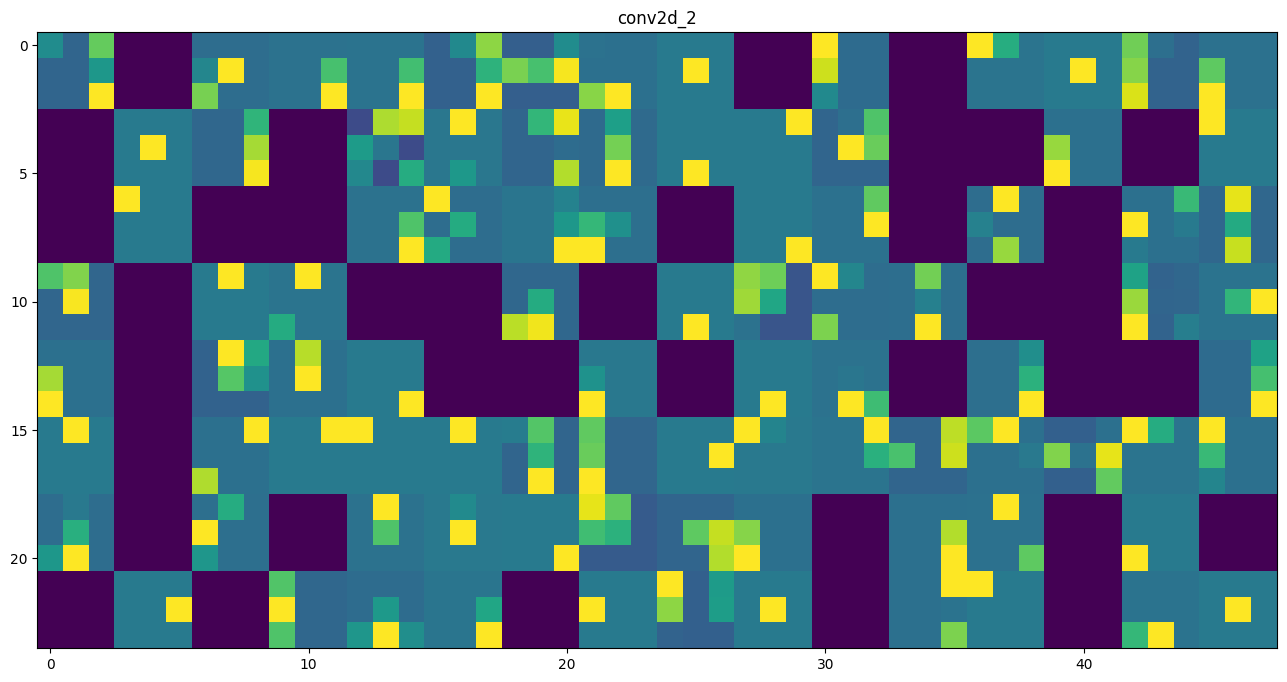

In [78]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')